# Movie Rating Prediction

**Project by: Mayur Rajput**

### Project Goal:

The Goal of this project is to build a model that predicts the rating of a movie based on features like genre, director and actors.

### Project Description :

The Movie Rating Prediction project aims to build a predictive model using Python that can estimate the rating of a movie based on various features such as genre, director and actors. This project employs regression techniques to tackle the problem, enabling us to analyze historical movie data and develop a model that accurately predicts the rating given to a movie by users or critics. Through this project, we will gain experience in data analysis, data preprocessing, feature engineering, and machine learning modeling techniques. It provides valuable insights into the factors that influence movie ratings and allows you to create a model that can estimate movie ratings with a high degree of accuracy.

#### Here’s a step-by-step breakdown of what we’ll do :

**Data Collection:** Gather a comprehensive dataset of movies that includes information about genres, directors, actors, and movie ratings. You can acquire this data from sources like IMDb, Kaggle, or other movie databases.

**Data Preprocessing:** Clean and prepare the dataset for analysis. This includes handling missing data, removing duplicates, and converting categorical variables (e.g., genres) into a suitable format for modeling.

**Feature Engineering:** Identify and create relevant features from the dataset. Consider the impact of variables such as the number of famous actors in a movie or the director's track record on the movie's rating.

**Exploratory Data Analysis (EDA):** Conduct an in-depth analysis of the dataset to understand the relationships between features and movie ratings. Visualize the data to discover patterns and correlations.

**Model Selection:** Choose appropriate regression models to predict movie ratings. Experiment with different algorithms, such as linear regression, decision trees, random forests, or gradient boosting.

**Model Training:** Split the dataset into training and testing sets. Train the selected models on the training data, and fine-tune hyperparameters to optimize their performance.

**Model Evaluation:** Evaluate the models using appropriate metrics such as Mean Absolute Error (MAE), Root Mean Square Error (RMSE), or R-squared. Select the best-performing model for the final prediction.


## 1. Importing Necessary Libraries

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

## 2. Loading Dataset

In [3]:
data = pd.read_csv('IMDb_Movies_India.csv')

## 3. Data Exploration

In [4]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
border: 1px solid black !important;
}
</style>

In [5]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90.0,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.0,105.0,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [6]:
data.shape

(15509, 10)

In [7]:
data.describe()

,Year,Duration,Rating
count,14981.000000,7240.000000,7919.000000
mean,1987.012215,128.126519,5.841621
std,25.416689,28.912724,1.381777
min,1913.000000,2.000000,1.100000
25%,1968.000000,110.000000,4.900000
50%,1991.000000,131.000000,6.000000
75%,2009.000000,147.000000,6.800000
max,2022.000000,321.000000,10.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   float64
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7919 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(3), object(7)
memory usage: 1.2+ MB


### 3.1 Identifying Missing Values in Dataset :

In [9]:
data.isnull().mean()*100

Name         0.000000
Year         3.404475
Duration    53.317429
Genre       12.102650
Rating      48.939326
Votes       48.939326
Director     3.385131
Actor 1     10.426204
Actor 2     15.371720
Actor 3     20.272100
dtype: float64

## 4. Data PreProcessing

### 4.1 - Handling Missing Values in Dataset :

In [10]:
data.dropna(inplace= True)

In [11]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997.0,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005.0,142.0,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012.0,82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [12]:
# Remove commas and convert 'Votes' to integer
data['Votes'] = data['Votes'].str.replace(',', '', regex=True).astype(int)

In [13]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997.0,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005.0,142.0,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012.0,82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [14]:
data.shape

(5659, 10)

### 4.2 - Removing Duplicates from Dataset :

In [15]:
data.drop_duplicates(inplace = True)

In [16]:
data.shape

(5659, 10)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   float64
 2   Duration  5659 non-null   float64
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int32  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(3), int32(1), object(6)
memory usage: 464.2+ KB


In [18]:
data.describe()

,Year,Duration,Rating,Votes
count,5659.000000,5659.000000,5659.000000,5659.000000
mean,1996.247570,133.439124,5.898533,2697.649585
std,19.741839,25.319939,1.381165,13651.503584
min,1931.000000,21.000000,1.100000,5.000000
25%,1983.000000,119.000000,5.000000,30.000000
50%,2002.000000,135.000000,6.100000,131.000000
75%,2013.000000,150.000000,6.900000,922.500000
max,2021.000000,321.000000,10.000000,591417.000000


### 4.3 - Data Visualizations:

**1 - Rating Ditribution :**

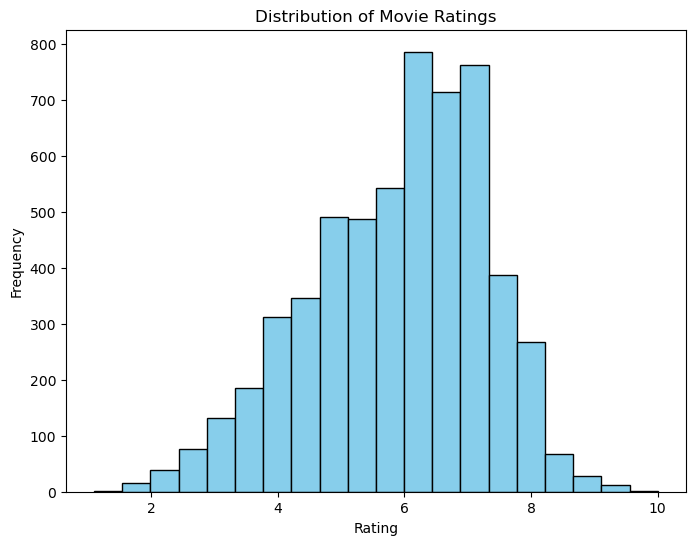

In [19]:
plt.figure(figsize=(8, 6))
plt.hist(data['Rating'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Ratings')
plt.show()

**2 - Count of Movies Released Each Year:**

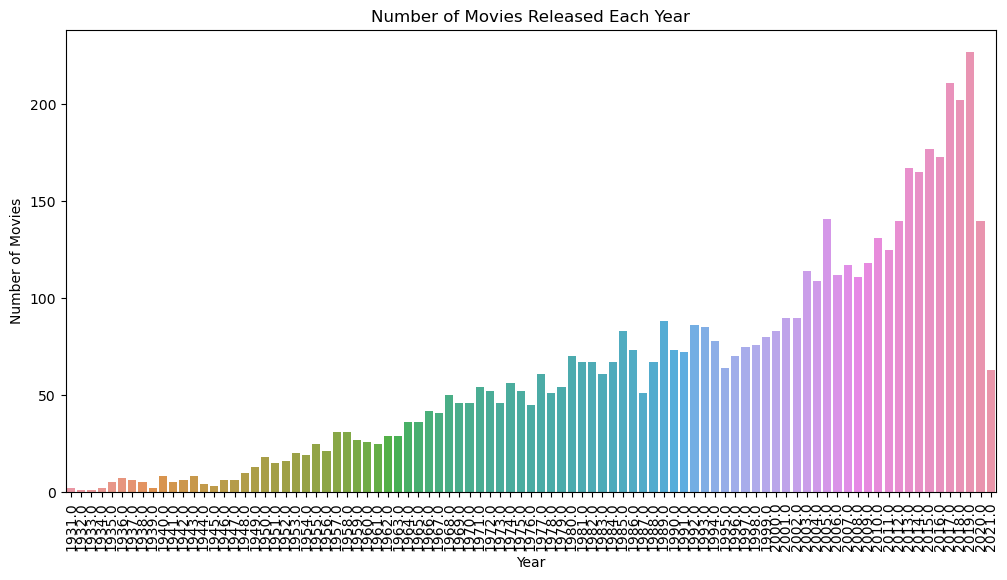

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released Each Year')
plt.xticks(rotation=90)
plt.show()

**3. Movie Duration vs Rating :**

<AxesSubplot:xlabel='Duration', ylabel='Rating'>

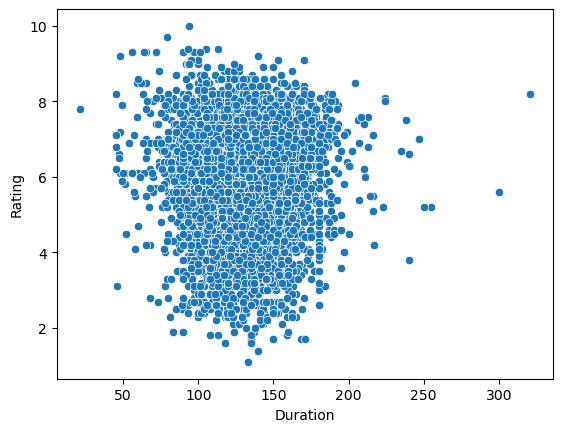

In [24]:
sns.scatterplot(x='Duration', y ='Rating', data=data)

**4. Movie Rating vs Votes :**

<AxesSubplot:xlabel='Rating', ylabel='Votes'>

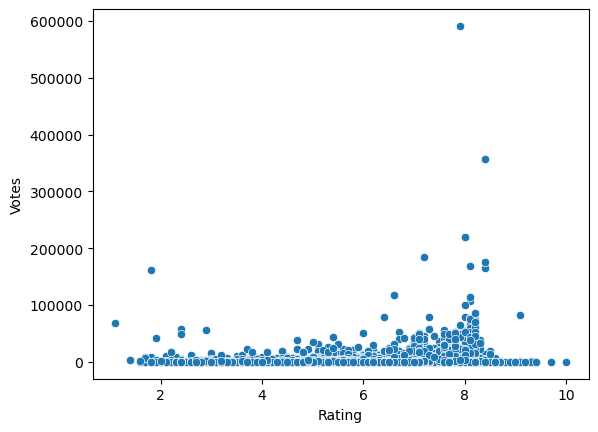

In [25]:
sns.scatterplot(x='Rating', y ='Votes', data=data)

### 4.4 - Encoding text data into Numerical form

In [29]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997.0,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005.0,142.0,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012.0,82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [40]:
categorical_features = ['Genre', 'Director', 'Actor 1','Actor 2','Actor 3']
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])

### 4.5 - Defining Features and and Target variable

In [41]:
x = data[['Genre', 'Director', 'Actor 1','Actor 2','Actor 3']]
y = data['Rating']

In [42]:
print(x)

       Genre  Director  Actor 1  Actor 2  Actor 3
1        229       629     1352     2272      319
3        184      1335     1198      719     2148
5        157      1530      378       75     2045
6        289      2044      692     1112     2524
8        320       135     1934     1175     1013
...      ...       ...      ...      ...      ...
15493    229      1223     1861     1801     1615
15494    133      2059      763     1619     1184
15503     28      1793      406      754     1685
15505     38      1025      112     2164      314
15508     38       895      468      753      303

[5659 rows x 5 columns]


In [43]:
print(y)

1        7.0
3        4.4
5        4.7
6        7.4
8        5.6
        ... 
15493    6.1
15494    6.2
15503    5.8
15505    4.5
15508    6.2
Name: Rating, Length: 5659, dtype: float64


### 4.6 - Data Standardization

In [46]:
scaler = StandardScaler()

In [47]:
 standardized_data = scaler.fit_transform(x)

In [48]:
x = standardized_data
y = data['Rating']

In [49]:
print(x)

[[ 0.52931791 -0.84886812  0.6816723   1.63359215 -1.32934107]
 [ 0.11341838  0.17933035  0.40902916 -0.69552904  1.21099562]
 [-0.13612133  0.46332284 -1.04270705 -1.66137196  1.06793675]
 ...
 [-1.32836665  0.84634861 -0.99313557 -0.64303758  0.56792515]
 [-1.23594453 -0.2721449  -1.51363611  1.47161849 -1.33628568]
 [-1.23594453 -0.46147323 -0.88337015 -0.64453734 -1.35156381]]


In [50]:
print(y)

1        7.0
3        4.4
5        4.7
6        7.4
8        5.6
        ... 
15493    6.1
15494    6.2
15503    5.8
15505    4.5
15508    6.2
Name: Rating, Length: 5659, dtype: float64


### 4.7 - Splitting data into Training and Testing Model

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [53]:
print(x.shape, x_train.shape, x_test.shape)

(5659, 5) (4527, 5) (1132, 5)


## 5 - Model Building & Training

For this Regression task like predicting a continuos value, we'll use Random Forest Regresssion model.

In [63]:
regressor = RandomForestRegressor(n_estimators=100)

In [64]:
regressor.fit(x_train, y_train)

RandomForestRegressor()

## 6 - Model Evaluation

In [67]:
# Accuracy of training data
x_train_prediction = regressor.predict(x_train)
mae = mean_absolute_error(x_train_prediction, y_train)
print("Mean Absolute error: ", mae)

Mean Absolute error:  0.3909513953317133


In [69]:
# Accuracy of testing data
x_test_prediction = regressor.predict(x_test)
mae = mean_absolute_error(x_test_prediction, y_test)
print("Mean Absolute error: ", mae)

Mean Absolute error:  1.0498388103651355
